In [17]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [18]:
#DATASET

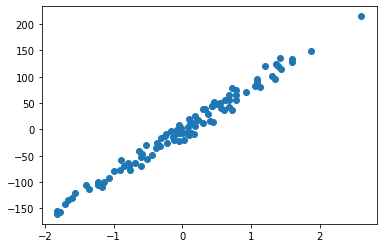

In [19]:
x, y = make_regression(n_samples = 100, n_features=1, noise=10)
plt.scatter(x,y)

In [22]:
print(x.shape)
y = y.reshape(y.shape[0],1) #redimessionner
print(y.shape)

(100, 1)
(100, 1)


In [27]:
#matrice X
X = np.hstack((x,np.ones(x.shape)))
X.shape

(100, 2)

In [29]:
theta = np.random.randn(2,1)
theta

array([[ 1.24873811],
       [-1.04447337]])

In [30]:
#Modele

In [31]:
def model(X,theta):
    return X.dot(theta) #produit matriciel

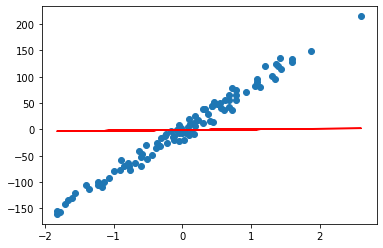

In [35]:
plt.scatter(x,y)
plt.plot(x,model(X,theta), c='r')

In [36]:
#Fonction cout

In [39]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [71]:
cost_function(X,y,theta)

2765.3049273309775

In [72]:
#Gradient descent

In [73]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [80]:
def gradient_descent(X,y,theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] =  cost_function(X,y,theta)
    return theta, cost_history

In [81]:
#Machine learning

In [82]:
theta_final, cost_history = gradient_descent(X,y,theta, learning_rate=0.01, n_iteration=1000)

In [83]:
theta_final

array([[82.8147573 ],
       [-1.18737459]])

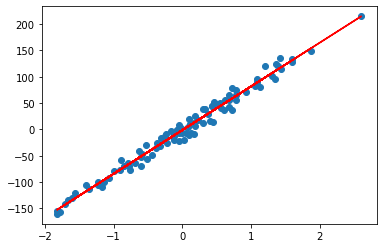

In [84]:
predictions = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions, c='r')

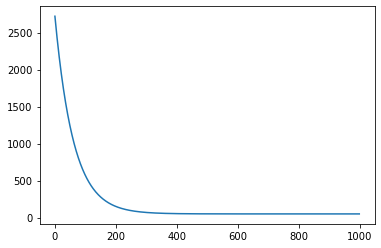

In [85]:
plt.plot(range(1000), cost_history)

In [86]:
#Coef de determination

In [87]:
def coef_determination(y, pred):
    u = ((y-pred)**2).sum() 
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [88]:
coef_determination(y, predictions)

0.9824289421802395